# Machine Learning usando DecisionTree - Projeto 4

Classificação de carros à venda para recomendar preços baseado nas features:
- minhas rodadas por ano;
- Ano do modelo;
- preço em dólares.

A classificação é lógica, onde 'yes' significa que o carro foi vendido, e 'no' que não.

## Importando e tratando os dados


In [ ]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
#renomeando as colunas para o português

dados.columns = ["vazio","milhas_por_ano","ano_do_modelo","preco","vendido"]
dados.head()

,vazio,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
#trocando os dados da coluna vendido para 0 e 1:
mapa = {'no': 0,
        'yes':1}

dados.vendido = dados.vendido.map(mapa)
dados.head()

,vazio,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
#criando uma feature para calculara idade dos veículos
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,vazio,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [ ]:
#convertendo de milhas para quilômetros

dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,vazio,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [ ]:
#removendo colunas que não serão usadas na análises
dados = dados.drop(columns=['vazio','milhas_por_ano','ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


## Construindo o Modelo de Precição


In [ ]:
#importando o SciKit Learn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np


#definindo as variáveis de projeto
x = dados[['preco', 'idade_do_modelo','km_por_ano']]
y = dados['vendido']

SEED = 90
np.random.seed(SEED)

#dividindo as amostras de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.25, stratify=y)
print("Utilizando %d elementos para treino e %d elementos para teste" % (len(X_treino),len(X_teste)))

#construindo o modelo e realizando a predição
modelo = LinearSVC()
modelo.fit(X_treino,y_treino)
previsoes = modelo.predict(X_teste)

#calculando a acurácia
acuracia = accuracy_score(y_teste,previsoes) * 100
print("A acurácia foi: %.2f%% " % acuracia)

Utilizando 7500 elementos para treino e 2500 elementos para teste
A acurácia foi: 60.48% 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Para avaliar se o resultado é bom, vamos usar um Dummy classifier para verificar quão eficiente foi o modelo de predição construido com o ```LinearSVC```.

In [ ]:
from sklearn.dummy import DummyClassifier

#construindo o modelo Dummy e calculando o score
dummy = LinearSVC()
dummy.fit(X_treino,y_treino)
acuracia = dummy.score(X_teste,y_teste) *100
print("A acurácia do Dummy foi: %.2f%% " % acuracia)


A acurácia do Dummy foi: 58.80% 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Usando modelos não-lineares

### SVC


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#apliocando o Scaler

scaler = StandardScaler()
scaler.fit(X_treino)
X_treino_escalonado = scaler.transform(X_treino)
X_teste_escalonado = scaler.transform(X_teste)

#construindo o modelo e realizando a predição
modelo = SVC()
modelo.fit(X_treino_escalonado,y_treino)
previsoes = modelo.predict(X_teste_escalonado)

#calculando a acurácia
acuracia = accuracy_score(y_teste,previsoes) * 100
print("A acurácia foi: %.2f%% " % acuracia)

A acurácia foi: 77.96% 


### Árvore de decisão

A vantagem de se utilizar um algoritmo de árvore de Decisão é que os critérios adotados pelo método são explícitos, e podem ser representados de forma gráfica utilizando grafos.

Outra vantagem é que as árvores de decisão não são vulneráveis à escolonamento. Logo, não é necessário usar o ```StandardScaler()```.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#apliocando o Scaler


#construindo o modelo e realizando a predição
modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(X_treino,y_treino)
previsoes_arvore = modelo_arvore.predict(X_teste)

#calculando a acurácia
acuracia = accuracy_score(y_teste,previsoes_arvore) * 100
print("A acurácia foi: %.2f%% " % acuracia)

A acurácia foi: 79.20% 


Para visualizar este modelo de forma gráfica, o *SKLearn*  disponibiliza a biblioteca ```export_graphviz```, que gera os parâmetros para construirmos os grafos que representam a árvore de decisão construida.

Estes dados vão ser salvos em uma variável (```dot_data```), a qual vamos utilizar para construir o gráfico no ```graphviz```.


In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo_arvore)

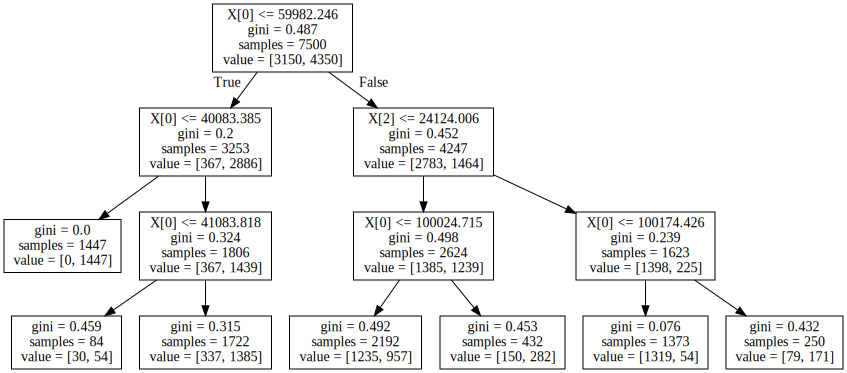

In [ ]:
import graphviz

grafico = graphviz.Source(dot_data)
grafico

podemos melhorar a visualização acima manipulando alguns parâmetros do ```export_graphviz()```. Por exemplo, podemos identificar quem são as variáveis em cada nó, adicionar cores mais intuitivas, e tornar explícitas quais são as classificações que o modelo está tomando.

vamos demonstrar isso na prática:

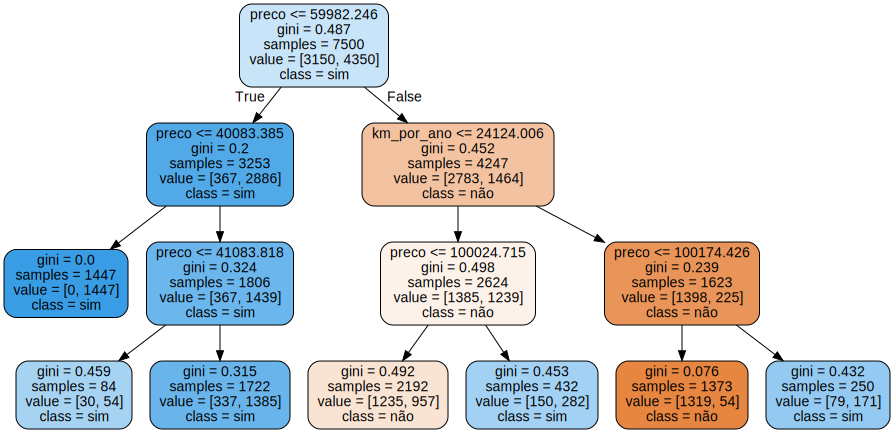

In [ ]:

dot_data = export_graphviz(modelo_arvore,             #modelo a ser representado
                           feature_names = x.columns, #representando nominalmente as features do modelo
                           filled=True,               #preenchendo os nós com cores 
                           rounded=True,              #nós arrendondados
                           class_names= ['não','sim'] #Resultado da venda. Sim ou não.
                           ) 

grafico = graphviz.Source(dot_data)
grafico